In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

%matplotlib inline
from chunhu import util

In [28]:
from PIL import Image, ImageFont, ImageDraw
im = Image.open('./online_set/a.gif')
%matplotlib inline

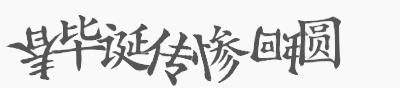

In [29]:
im

In [30]:
vec = util.img2vec(im)

In [31]:
vec.shape

(88, 400)

In [32]:
Y = []
for i in range(88):
    for j in range(400):
        if vec[i][j] <= 200:
            Y.append([i, j])

In [33]:
Y = np.array(Y, dtype=int)

In [34]:
k_means = KMeans(init='k-means++', n_clusters=7, n_init=10)

In [35]:
k_means.fit(Y)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [36]:
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)

In [37]:
k_means_cluster_centers

array([[  38.39470366,   36.99563319],
       [  40.90118577,   79.61790668],
       [  47.56786102,  124.60694897],
       [  48.37970353,  169.55641593],
       [  51.20087336,  217.77732794],
       [  52.87753036,  275.87115165],
       [  56.0630531 ,  319.4416996 ]])

In [38]:
im = im.convert("RGBA")

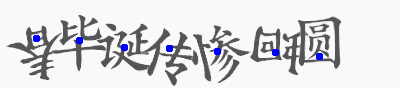

In [39]:
util.PaintPoint(im, k_means_cluster_centers)

In [68]:
def crop(im, y, x, radius = 20):
    return im.crop((x-radius, y-radius, x+radius, y+radius))